In [11]:
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Found 105 .npz files in the folder.


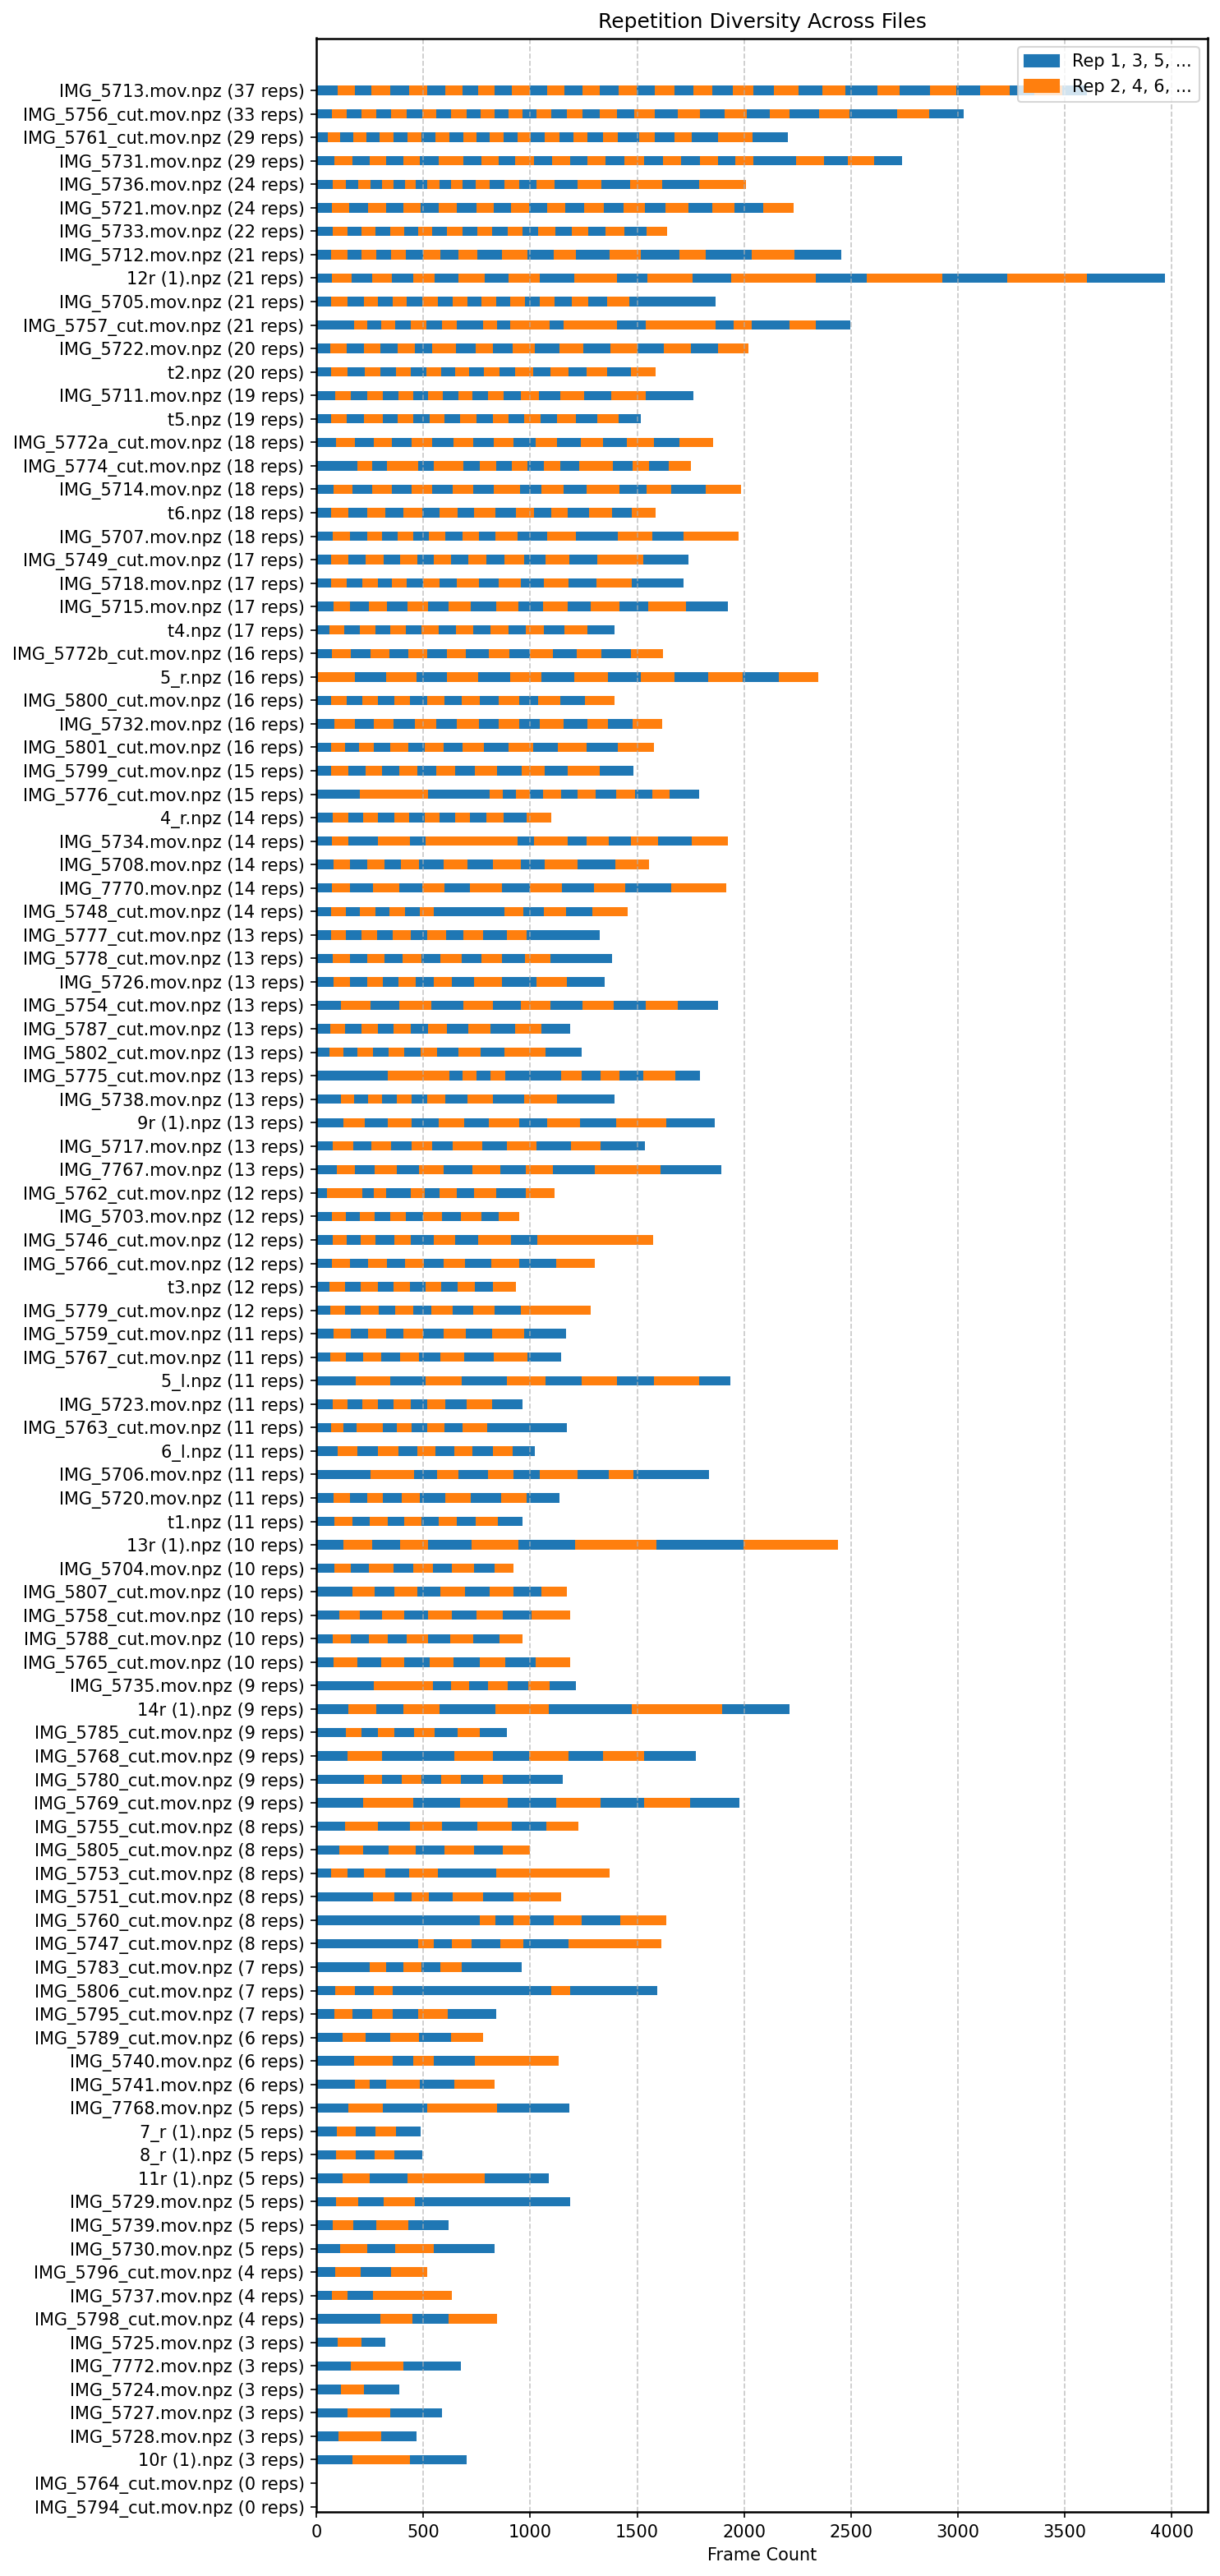

In [12]:
# Specify the folder containing .npz files
npz_folder = "processed_npzs"  # Replace with your actual folder path

# Find all .npz files in the folder
npz_files = glob(os.path.join(npz_folder, "*.npz"))

print(f"Found {len(npz_files)} .npz files in the folder.")

# Prepare data for visualisation
file_data = []

for npz_file in npz_files:
    # Load the .npz file
    data = np.load(npz_file)
    
    # Get the file name without the path
    file_name = os.path.basename(npz_file)
    
    # Extract repetitions and their frame counts
    reps = [len(rep) for rep in data.values()]
    
    # Store the file name, number of reps, and frame counts
    file_data.append((file_name, len(reps), reps))
    
    # Close the file
    data.close()

# Sort files by the number of repetitions (ascending order)
file_data.sort(key=lambda x: x[1])

# Visualisation
fig, ax = plt.subplots(figsize=(10, max(7, len(file_data) * 0.2)), dpi=150)  # Adjust height for tighter spacing

y_labels = []
y_positions = []
bar_colors = ["#1f77b4", "#ff7f0e"]  # Alternating colours for reps

for i, (file_name, num_reps, reps) in enumerate(file_data):
    y_labels.append(f"{file_name} ({num_reps} reps)")
    y_positions.append(i)
    
    start = 0
    for j, rep_length in enumerate(reps):
        ax.barh(i, rep_length, left=start, color=bar_colors[j % 2], height=0.4)  # Reduce bar height
        start += rep_length

# Customise the plot
ax.set_yticks(y_positions)
ax.set_yticklabels(y_labels)
ax.set_xlabel("Frame Count")
ax.set_title("Repetition Diversity Across Files")
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Reduce margins
ax.margins(y=0.02)  # Reduce vertical margins

# Add legend for alternating colours
legend_patches = [
    mpatches.Patch(color=bar_colors[0], label="Rep 1, 3, 5, ..."),
    mpatches.Patch(color=bar_colors[1], label="Rep 2, 4, 6, ..."),
]
ax.legend(handles=legend_patches, loc="upper right")

plt.tight_layout()
plt.show()
